<a href="https://colab.research.google.com/github/AnnaMatlapudi/ml-project-1/blob/main/bike_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Bike sharing dataset

- This dataset contains the hourly and daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information.

Data Set Information:

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. 

Attribute Information:

Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

- instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered



----  
The regression goal is to predict bike count given various attributes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('hour.csv')
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
# Shape of the dataset
df.shape

(17379, 17)

In [4]:
from tables.table import Column
# Renaming the data
df.rename(columns = { 'instant': 'id',
                       'dteday': 'datetime',
                       'weathersit':'weather',
                       'hum':'humidity',
                       'mnth':'month',
                       'cnt':'total_count',
                       'hr':'hour',
                       'yr':'year'},inplace = True)


In [5]:
df.head()

,id,datetime,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [6]:
df.dtypes

id               int64
datetime        object
season           int64
year             int64
month            int64
hour             int64
holiday          int64
weekday          int64
workingday       int64
weather          int64
temp           float64
atemp          float64
humidity       float64
windspeed      float64
casual           int64
registered       int64
total_count      int64
dtype: object

In [7]:
# Date time conversion
df['datetime'] =pd.to_datetime(df.datetime)
# Categorical variables
df['season'] =df['season'].astype('category')
df['year'] =df['year'].astype('category')
df['month'] =df['month'].astype('category')
df['hour'] =df['hour'].astype('category')
df['holiday'] =df['holiday'].astype('category')
df['weekday'] =df['weekday'].astype('category')

df['workingday'] =df['workingday'].astype('category')
df['weather'] =df['weather'].astype('category')

In [8]:
df.dtypes

id                      int64
datetime       datetime64[ns]
season               category
year                 category
month                category
hour                 category
holiday              category
weekday              category
workingday           category
weather              category
temp                  float64
atemp                 float64
humidity              float64
windspeed             float64
casual                  int64
registered              int64
total_count             int64
dtype: object

In [9]:
# Convert the categorical features
# Creating dummies for all these variables
df_season = pd.get_dummies(df['season'],prefix = 'season')
df_holi = pd.get_dummies(df['holiday'],prefix = 'holi')
df_wkd = pd.get_dummies(df['weekday'],prefix = 'weekday')
df_weather = pd.get_dummies(df['weather'],prefix = 'weather')
df_wrkgdy = pd.get_dummies(df['workingday'],prefix = 'workingday')
df_mnth = pd.get_dummies(df['month'],prefix = 'month')
df_hr = pd.get_dummies(df['hour'],prefix = 'hr')
df_yr = pd.get_dummies(df['year'],prefix = 'yr')

In [10]:
# Check for missing observations
df.isnull().sum()

id             0
datetime       0
season         0
year           0
month          0
hour           0
holiday        0
weekday        0
workingday     0
weather        0
temp           0
atemp          0
humidity       0
windspeed      0
casual         0
registered     0
total_count    0
dtype: int64

In [11]:
(df.isnull().sum()/len(df)).sort_values(ascending =False)

id             0.0
weather        0.0
registered     0.0
casual         0.0
windspeed      0.0
humidity       0.0
atemp          0.0
temp           0.0
workingday     0.0
datetime       0.0
weekday        0.0
holiday        0.0
hour           0.0
month          0.0
year           0.0
season         0.0
total_count    0.0
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


mu = 189.46 and sigma = 181.38


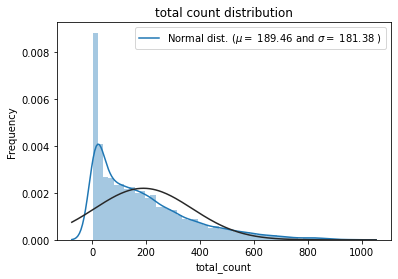

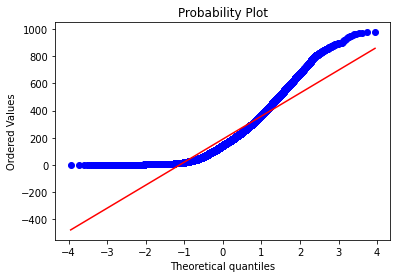

In [12]:
# Test - Distribution of Dependent Variable
from scipy import stats
from scipy.stats import norm, skew
sns.distplot(df['total_count'] , fit=norm);
# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['total_count'])
print( 'mu = {:.2f} and sigma = {:.2f}'.format(mu, sigma))
#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc ='best')
plt.ylabel('Frequency')
plt.title('total count distribution')

#Get also the QQ-plot

fig = plt.figure()
res = stats.probplot(df['total_count'], plot = plt)
plt.show()

Text(0, 0.5, 'Freq')

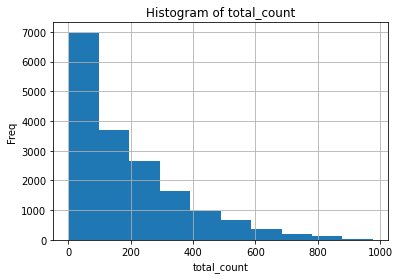

In [13]:
# plotting the Histogram of the dataset
df.total_count.hist()
plt.title('Histogram of total_count')
plt.xlabel('total_count')
plt.ylabel('Freq')


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


mu = 4.57 and sigma = 1.42


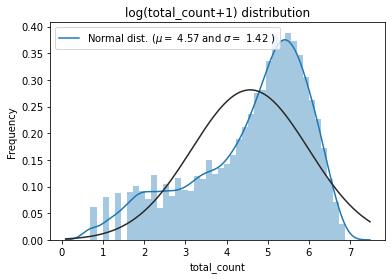

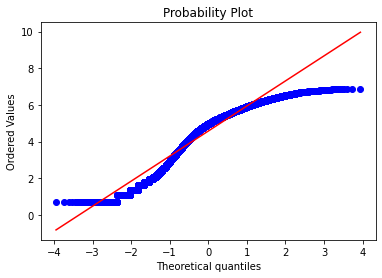

In [14]:
# Log-transformation of the Dependent Variable
sns.distplot(np.log1p(df['total_count']) , fit=norm);
# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(np.log1p(df['total_count']))
print( 'mu = {:.2f} and sigma = {:.2f}'.format(mu, sigma))
#Now plot the distribution

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc = 'best')
plt.ylabel('Frequency')
plt.title('log(total_count+1) distribution')

#Get also the QQ-plot

fig = plt.figure()
res = stats.probplot(np.log1p(df['total_count']), plot = plt)
plt.show()


In [15]:
df.describe()

,id,temp,atemp,humidity,windspeed,casual,registered,total_count
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


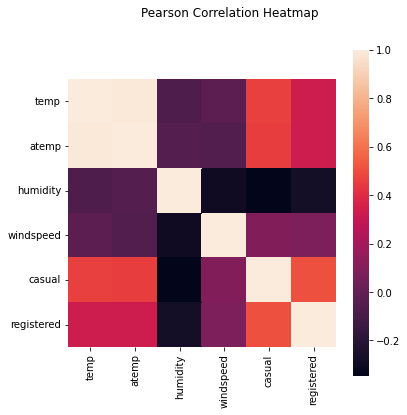

In [16]:
# Check for correlation with the Numeric features
df_dropid = df.drop(['id'],axis=1)
pd.set_option('precision',2)
plt.figure(figsize=(6,6))
sns.heatmap(df_dropid.drop(['total_count'],axis=1).corr(), square = True)
plt.suptitle("Pearson Correlation Heatmap")
plt.show()

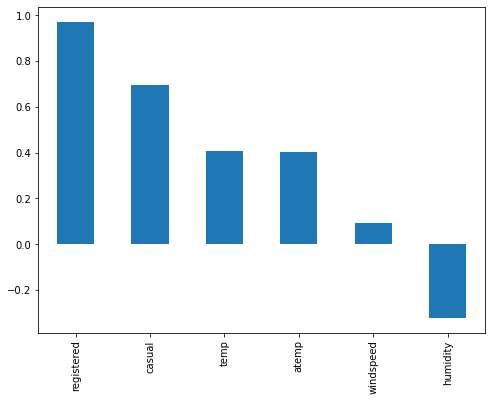

In [17]:
corr_with_tot_count = df_dropid.corr()["total_count"].sort_values(ascending=False)
plt.figure(figsize=(8,6))
corr_with_tot_count.drop("total_count").plot.bar()
plt.show()

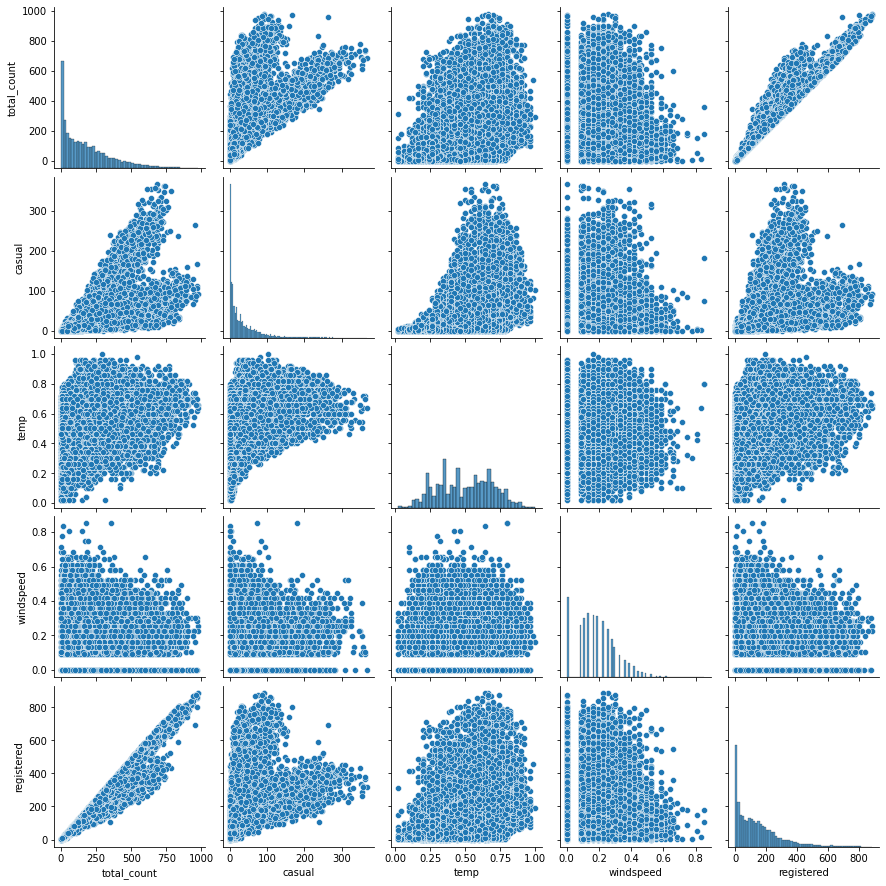

In [18]:
sns.pairplot(df_dropid[['total_count', 'casual', 'temp', 'windspeed','registered']])
plt.show()

In [19]:
# Create the final dataset with all the relevant features - both dependent and (independent variable)predictors
feature_x = ['temp','atemp','humidity','windspeed','casual','registered']
df_feature = df[feature_x]

# Creating the Final data with all the relevant fields and Dependent Variable
df_new = pd.concat([df_season,df_holi,df_wkd,df_wrkgdy,
                       df_weather,df_mnth,df_yr,df_hr,
                       df_feature,df['total_count']],axis = 1)

In [20]:
df_new.shape

(17379, 64)

In [21]:
df_new.head()

,season_1,season_2,season_3,season_4,holi_0,holi_1,weekday_0,weekday_1,weekday_2,weekday_3,...,hr_21,hr_22,hr_23,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0.24,0.29,0.81,0.0,3,13,16
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0.22,0.27,0.80,0.0,8,32,40
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0.22,0.27,0.80,0.0,5,27,32
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0.24,0.29,0.75,0.0,3,10,13
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0.24,0.29,0.75,0.0,0,1,1


-- Find out outliers if any.. 

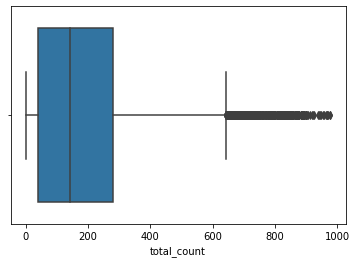

In [22]:
# Box-Plot
import seaborn as sns
sns.boxplot(x=df['total_count'])

In [23]:
df_new.describe()

,season_1,season_2,season_3,season_4,holi_0,holi_1,weekday_0,weekday_1,weekday_2,weekday_3,...,hr_21,hr_22,hr_23,temp,atemp,humidity,windspeed,casual,registered,total_count
count,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,...,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00
mean,0.24,0.25,0.26,0.24,0.97,0.03,0.14,0.14,0.14,0.14,...,0.04,0.04,0.04,0.50,0.48,0.63,0.19,35.68,153.79,189.46
std,0.43,0.44,0.44,0.43,0.17,0.17,0.35,0.35,0.35,0.35,...,0.20,0.20,0.20,0.19,0.17,0.19,0.12,49.31,151.36,181.39
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,1.00
25%,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.34,0.33,0.48,0.10,4.00,34.00,40.00
50%,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.50,0.48,0.63,0.19,17.00,115.00,142.00
75%,0.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.66,0.62,0.78,0.25,48.00,220.00,281.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,0.85,367.00,886.00,977.00


In [24]:
df_new.shape

(17379, 64)

# Feature Selection - Regularization


In [25]:
X = df_new.drop(['total_count'],axis=1)
y = df_new['total_count']


In [26]:
X.shape

(17379, 63)

In [27]:
y.shape

(17379,)

In [28]:
# Creating the Feature Space for the data
X_colnames = [cols for cols in df_new.columns.tolist() if cols not in [
'total_count'
]]
X_colnames

['season_1',
 'season_2',
 'season_3',
 'season_4',
 'holi_0',
 'holi_1',
 'weekday_0',
 'weekday_1',
 'weekday_2',
 'weekday_3',
 'weekday_4',
 'weekday_5',
 'weekday_6',
 'workingday_0',
 'workingday_1',
 'weather_1',
 'weather_2',
 'weather_3',
 'weather_4',
 'month_1',
 'month_2',
 'month_3',
 'month_4',
 'month_5',
 'month_6',
 'month_7',
 'month_8',
 'month_9',
 'month_10',
 'month_11',
 'month_12',
 'yr_0',
 'yr_1',
 'hr_0',
 'hr_1',
 'hr_2',
 'hr_3',
 'hr_4',
 'hr_5',
 'hr_6',
 'hr_7',
 'hr_8',
 'hr_9',
 'hr_10',
 'hr_11',
 'hr_12',
 'hr_13',
 'hr_14',
 'hr_15',
 'hr_16',
 'hr_17',
 'hr_18',
 'hr_19',
 'hr_20',
 'hr_21',
 'hr_22',
 'hr_23',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'casual',
 'registered']

In [29]:
# Creating Training and Test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X ,y, test_size = 0.20,random_state=3)

In [30]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(13903, 63)
(3476, 63)
(13903,)
(3476,)


In [31]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNetCV
cv_model = ElasticNetCV(l1_ratio=[.1,.2,.3,.4, .5, .7, .9, .95, .99, 1], eps=1e-3, n_alphas=100, 
                        fit_intercept = True, 
                        normalize = True, precompute = 'auto', max_iter = 2000, tol = 0.0001, cv = 10, 
                        copy_X = True, verbose=0, positive = False, random_state=0)
               
cv_model.fit(X_train, y_train)
print('Optimal alpha: %.8f'%cv_model.alpha_)
print('Optimal l1_ratio: %.3f'%cv_model.l1_ratio_)
print('Number of iterations %d'%cv_model.n_iter_)

Optimal alpha: 0.00149674
Optimal l1_ratio: 1.000
Number of iterations 18


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  FutureWarning,


In [ ]:
import time
from datetime import datetime
def log_msg(message):
    print(str(datetime.now()) + ": " + message)

log_msg("Started running LR for feature selection...")
from sklearn.feature_selection import RFE,RFECV
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RandomizedLasso

# from sklearn.feature_selection import RFE
 
# lr1 = ElasticNet(alpha='0.00160287', l1_ratio=1.0)
lr1 = LinearRegression()
rfe = RFE(estimator=lr1, n_features_to_select=30, step=1)
rfe.fit(X_train, y_train)

log_msg("Completed running LR for feature selection...")